# A CDC Halloween 🎃 Explore and Visualize
<p>Harshika Jain<br>
Human AI Interaction HW3 Part 1<br>
Professors: Chinmay Kulkarni, Mary Beth Kery</p>
<hr>

<h2>Brief</h2>
<p>The Center for Disease Control and Prevention (CDC) is a federal public health and safety agency of the United States. This is an exploration of their public death dataset which records cause-of-death of everyone deceased in the United States. The CDC’s goal is to raise public awareness of health, so the dataset will only include deaths by natural causes or accidents, to help current residents of the country take better precautions about their own health.</p>

In [1]:
# import widgets for jupyternotebook
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/death_causes.csv") # create dataframe
data.head()

,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
0,2195403,93,F,White,4.0,3,1,Natural Causes,Widowed,I25,['Chronic ischemic heart disease'],Heart Disease
1,1585793,90,F,White,4.0,1,5,Natural Causes,Single,J18,"['Pneumonia, unspecified organism']",Respiratory Condition
2,115267,71,F,White,3.0,7,6,Natural Causes,Married,N39,['Other disorders of urinary system'],Bladder Condition
3,782491,77,F,White,3.0,6,3,Natural Causes,Widowed,C43,['Malignant melanoma of skin'],Cancer
4,1809783,79,F,White,3.0,2,3,Natural Causes,Widowed,I21,['ST elevation (STEMI) and non-ST elevation (N...,Heart Disease


In [3]:
data.describe()

,Unnamed: 0,age,education,month_of_death,day_of_week_of_death
count,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000
mean,1.458574e+06,74.66835,3.729810,6.326150,4.008460
std,7.107205e+05,17.08716,1.992116,3.510632,1.998717
min,7.000000e+00,0.00000,1.000000,1.000000,1.000000
25%,8.681295e+05,65.00000,3.000000,3.000000,2.000000
50%,1.491952e+06,78.00000,3.000000,6.000000,4.000000
75%,2.046388e+06,87.00000,5.000000,9.000000,6.000000
max,2.718193e+06,111.00000,9.000000,12.000000,9.000000


<h2>Description of the dataset</h2>
<p>As given by Mary Beth and Chinmay</p>
<table>
    <tr>
        <th text = "align:left;">Column</th>
        <th text = "align:left;">Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>random numerical id unique to a person</td>
    </tr>
    <tr>
        <td>age</td>
        <td>age in years</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>sex, restricted to F (female) or M (male), at time of death</td>
    </tr>
    <tr>
        <td>race</td>
        <td>Including: ['White', 'Black', 'Korean', 'Vietnamese', 'Indian', 'Native American', 'Hawaiian', 'Chinese', 'Japanese', 'other Asian or Pacific Islander', 'Filipino', 'Samoan','Guamanian']
        </td>
    </tr>
    <tr>
        <td>education</td>
        <td>1 ... 8th grade or less, 2 ... 9 - 12th grade, no diploma, 3 ... high school graduate or GED completed, 4 ... some college credit, but no degree, 5 ... Associate degree, 6 ... Bachelor’s degree, 7 ... Master’s degree, 8 ... Doctorate or professional degree, 9 ... Unknown<br>
        </td>
    </tr>
    <tr>
        <td>month_of_death</td>
        <td>numerical value of month</td>
    </tr>
        <tr>
        <td>day_of_week_of_death</td>
        <td>1 ... Sunday 
2 ... Monday 
3 ... Tuesday 
4 ... Wednesday 
5 ... Thursday
6 ... Friday 
7 ... Saturday 
9 ... Unknown
</td>
    </tr>
        <tr>
        <td>manner</td>
        <td>either ‘Natural Causes’ or ‘Accident’</td>
    </tr>
        <tr>
        <td>relationship_status</td>
        <td>S ... Never married or Single 
M ... Married 
W ... Widowed 
D ... Divorced 
U ... Unknown
</td>
    </tr>    
    <tr>
        <td>icd_code</td>
        <td>The exact cause of death as standardized by international medical classification codes. See https://icd.codes/icd10cm for reference</td>
    </tr>    
    <tr>
        <td>cause</td>
        <td>The exact cause of death, a text description (when available) of the icd code</td>
    </tr>    
    <tr>
        <td>Group</td>
        <td>General category for cause of death, including:
['Heart Disease', 'Respiratory Condition', 'Bladder Condition',
       'Cancer', 'Stroke', 'Motor Vehicle Accident', 'Seizures',
       'Infection', 'Mental or Behavioral', 'Liver Disease',
       'Birth Condition', 'Diseases of the nervous system', 'Diabetes',
       'Kidney Condition', 'Issues Breathing', 'Asthma',
       'Muscle/Bone Condition', 'Medical Care Error', 'Drug Use',
       'Accident', 'Fall', 'Congenital Anomalies', 'HIV/AIDS',
       'Unkown cause', 'Fire', 'Skin Condition', 'Other',
       'Natural Disaster', 'Pregnancy Related', 'Eye Condition',
       'Stomach or Bowel Issues', 'Male Reproductive Condition',
       'Female Reproductive Condition', 'Military Situation',
       'Disturbance of Behavior or Senses', 'Issues with Movement',
       'Heat Exposure', 'Urinary Abdominal Issues']
</td>
    </tr>    
</table>
<hr>

<h2>A. Histogram of death counts by age</h2>
<p>Create a histogram of death counts by age. [5 points]<br>
Hint: one axis should be sorted continuous range of age 0 up to the age of the oldest person in the dataset<p>

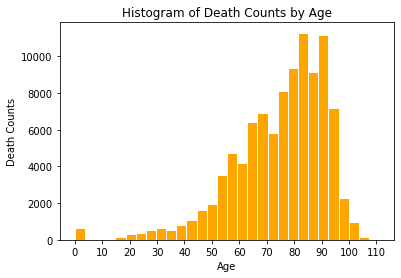

In [4]:
# age = data["age"]
plt.hist(data['age'], bins = 30, color = 'orange', edgecolor = 'white')
plt.title('Histogram of Death Counts by Age')
plt.xlabel('Age')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.ylabel('Death Counts')
plt.show()

In [5]:
counts, bin_edges = np.histogram(data['age'], bins = 30)
print(counts)

[  649    52    43    57   146   339   346   526   617   521   791  1076
  1628  1929  3524  4720  4205  6409  6900  5824  8133  9349 11295  9150
 11189  7206  2256   958   146    16]


In [6]:
print(bin_edges)

[  0.    3.7   7.4  11.1  14.8  18.5  22.2  25.9  29.6  33.3  37.   40.7
  44.4  48.1  51.8  55.5  59.2  62.9  66.6  70.3  74.   77.7  81.4  85.1
  88.8  92.5  96.2  99.9 103.6 107.3 111. ]


<h3>Inference: </h3>
<p>Highest number of deaths(11295) are in the age range of 81.4-85.1 years.</p>
<hr>

<h2>B. Histogram of deaths caused by cancer by age</h2>
<p>Create a histogram of deaths caused by cancer by age. [8 points]</p>
<p>The process followed to plot this graph was to isolate the rows by the cause of death, i.e. cancer in this case and plot a histogram of the ages of the isolated rows.</p>
<p>Useful resource reference for selecting rows when a column contains certain values <a href = "https://chrisalbon.com/python/data_wrangling/pandas_select_rows_when_column_has_certain_values/">https://chrisalbon.com/python/data_wrangling/pandas_select_rows_when_column_has_certain_values/</p>

In [7]:
value_list = ['Cancer']
cancer_df = data[data.group.isin(value_list)]

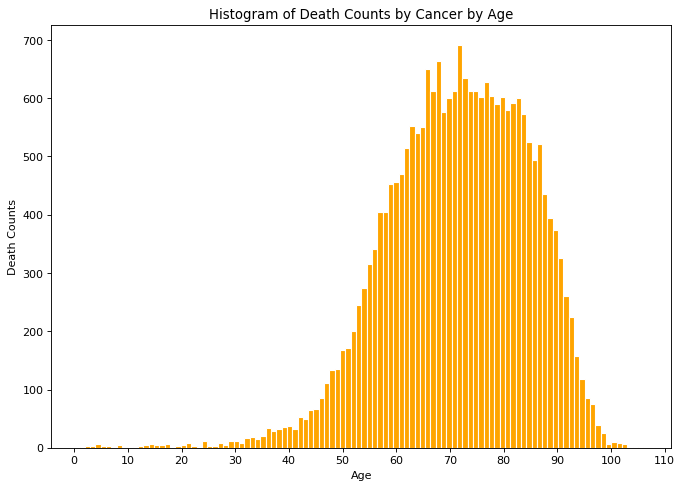

In [8]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(cancer_df['age'], bins = 106, color = 'orange', edgecolor = 'white')
plt.title('Histogram of Death Counts by Cancer by Age')
plt.xlabel('Age')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.ylabel('Death Counts')
plt.show()

### Inference
Highest number of deaths by cancer are caused at the age of 72. 

***
When shown data or an ML model, humans tend to have confirmation bias, meaning that they tend to believe that whatever the data or model says is what they really thought all along. Ever broke up with a significant other and your friends tell you “I told you so”? This is confirmation bias. With Bayesian reasoning, we can take into account a viewer’s prior reasonable guess before they see data. This is a good technique to help users reflect on how the data might conflict with “what they thought all along”. 

<h2>C. Relationship between age and death by Motor Vehicle Accident</h2>
<p>Write down what you believe (before looking at the data. Just guess!) is the relationship between age and death by Motor Vehicle Accident. Do you expect the risk of death by car accident to be the same across all ages or higher in certain age ranges? Why?[2 points]</p>
<h3>Answer:</h3>
<p>I expect the risk of death by Motor Vehicle Accidents to be different across age ranges. I think that it will be the highest in the age range of 18-25 years since most cases of drunk driving are reported in that age group. Drunk driving being the highest cause of motor Vehicle Accidents.</p>
<hr>

<h2>D. Relationship between age and death by Drug Use</h2>
<p>Write down what you believe (before looking at the data. Just guess!) is the relationship between age and death by Drug Use. Do you expect the risk of death by drug use to be the same across all ages or higher in certain age ranges? Why? [2 points]</p>
<h3>Answer: </h3>
<p>The risk of death use is definitely different across age ranges, perhaps highest for teens and veterans. The risks of death by drug use could be through consuming extra pills than prescribed, opioid addiction, etc. For teens it could be for pleasure, for veterans it could be to alleviate pain, but making a histogram would be the best way to check.</p>
<hr>

<h2>E1. Histogram of death by Motor Vehicle Accident by Age</h2>
<p>Create a histogram of death by Motor Vehicle Accident by age. Create a histogram of death by Drug Use by age. [5 points]</p>

In [9]:
value_list = ['Motor Vehicle Accident']
mva_df = data[data.group.isin(value_list)]

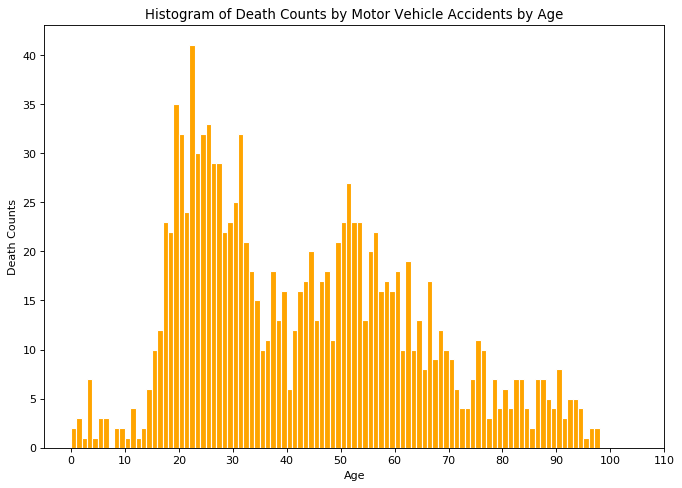

In [10]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(mva_df['age'], bins = 98, color = 'orange', edgecolor = 'white') 
# 98 is the bin number because that is the max value in the age column of the dataframe 
plt.title('Histogram of Death Counts by Motor Vehicle Accidents by Age')
plt.xlabel('Age')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.ylabel('Death Counts')
plt.show()

In [11]:
counts, bin_edges = np.histogram(mva_df['age'], bins = 25)
print(counts)

[ 13   7   9  19  92 127 123 102  64  58  51  68  55  86  75  63  48  40
  21  31  21  20  24  17   5]


In [12]:
print(bin_edges)

[ 0.    3.92  7.84 11.76 15.68 19.6  23.52 27.44 31.36 35.28 39.2  43.12
 47.04 50.96 54.88 58.8  62.72 66.64 70.56 74.48 78.4  82.32 86.24 90.16
 94.08 98.  ]


### Inference:
Highest number of death counts by Motor Vehicle Accidents are in the age range 19.6 - 23.52 years, spanning 123 deaths out of total reported 1239 deaths. To be more precise, the highest number of deathcount is for 23 year olds, declining as people reach an age of retirement. 

<h2>E2. Histogram of death by Drug Use by Age</h2>

In [13]:
value_list = ['Drug Use']
druguse_df = data[data.group.isin(value_list)]

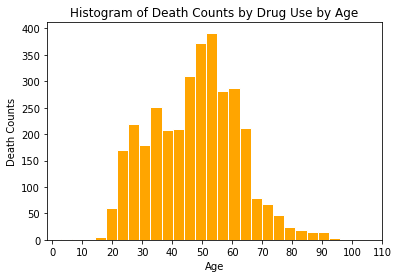

In [14]:
plt.hist(druguse_df['age'], bins = 25, color = 'orange', edgecolor = 'white')
plt.title('Histogram of Death Counts by Drug Use by Age')
plt.xlabel('Age')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.ylabel('Death Counts')
plt.show()

In [15]:
counts, bin_edges = np.histogram(druguse_df['age'], bins = 25)
print(counts)

[  1   0   0   6  60 170 220 179 252 207 210 310 373 392 281 288 212  79
  67  47  24  19  14  15   3]


In [16]:
print(bin_edges)

[ 3.    6.72 10.44 14.16 17.88 21.6  25.32 29.04 32.76 36.48 40.2  43.92
 47.64 51.36 55.08 58.8  62.52 66.24 69.96 73.68 77.4  81.12 84.84 88.56
 92.28 96.  ]


### Inference: 
Highest number of death counts by Drug Use are in the age range of 51.36-55.08 years, spanning 392 deaths out of thre reported 3429 total deaths.
*** 

<h2>F. Assumption v/s Calculation</h2>
<p>Compare your prior guess in C and D to the histograms in E. What did you learn from the histograms? Are there parts of your prior guess that were confirmed by the histograms? Are there parts of your prior guess that were wrong or different than you expected?<p>
<h3>Confirmed: </h3>
<p>I had anticipated that the death by Motor Vehicle Accidents would be the highest for the age range of 18-25 years and indeed they were the highest for the the age range of 19.6 - 27.44 years, which is quite close the anticipated range.</p>
<h3>Contradictory: </h3>
<p>My anticipation for Highest number of deaths by Drug Use was for teens and veterans. However, plotting the histogram showed that the highest number of death counts by drug use is for the age range 47.64 - 55.08 years, and not teenagers. The calculated age range of veterans somewhat matches the anticipated age range of veterans i.e. 45-64 years according to <a href = "https://www.va.gov/VETDATA/docs/SurveysAndStudies/VETPOP.pdf"> VA.gov</a></p>
<hr>

<h2>G: Different Causes of Death</h2>
<p>When users see different possibilities separately in a data or ML system, there’s a bias towards thinking all possibilities are equally likely, when really some options are more or less probable in real life. E.g., While a headache could be caused by fall allergies or by brain cancer, the likelihood of fall allergies is far higher in real life than brain cancer.</p>
<p>Create a visualization of your choice, where you overlay 4 different causes of death (your pick) by age the same plot. Design this visualization however you wish. Justify your design by writing a few sentences about how your visualization will help users compare the 4 different death risks by age. Talk about encoding choices such as: plot type, use of size, color, and axes labels. [20 points]</p>

<p>Useful resource reference:
<a href = "https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/">https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/ </a></p>

### Overlayed Histograms

In [17]:
value_list = ['Heart Disease']
heart_df = data[data.group.isin(value_list)]

In [18]:
value_list = ['Cancer']
cancer_df = data[data.group.isin(value_list)]

In [19]:
value_list = ['Diseases of the nervous system']
nervous_df = data[data.group.isin(value_list)]

In [20]:
value_list = ['Asthma']
asthma_df = data[data.group.isin(value_list)]

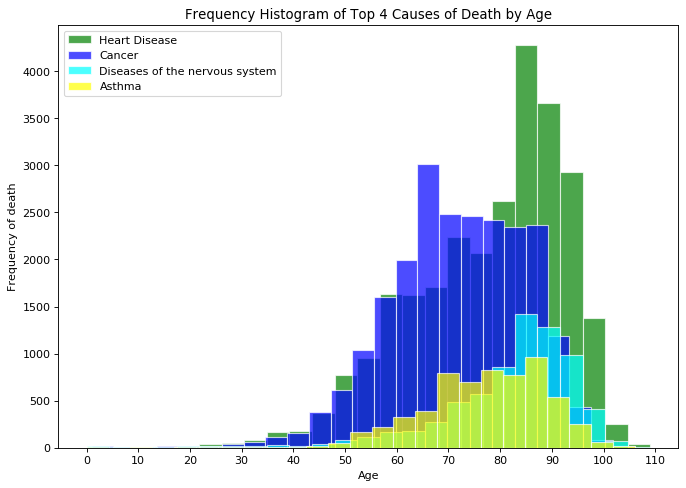

In [21]:
x1 = heart_df['age']
x2 = cancer_df['age']
x3 = nervous_df['age']
x4 = asthma_df['age']

kwargs = dict(alpha=0.7, bins=25, edgecolor = 'white')

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='green', label='Heart Disease')
plt.hist(x2, **kwargs, color='blue', label='Cancer')
plt.hist(x3, **kwargs, color='cyan', label='Diseases of the nervous system')
plt.hist(x4, **kwargs, color='yellow', label='Asthma')
plt.gca().set(title='Frequency Histogram of Top 4 Causes of Death by Age', ylabel='Frequency of death', xlabel = "Age")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.legend();

### How this visualization help users compare the 4 different death causes by Age:
* #### The plot type chosen is Overlayed Histograms which can tell user about most prevalent age ranges for death. For instance, users can see that the highest incidence of heart disease starts around mid 70s. This also gives a good overall picture of the top 4 causes of death, but not a granular view.
* #### The colors of the histograms are different to distinctly tell the difference between the 4 causes of death, which are depicted to the user using a legend to establish a better visual connection.
* #### Since the histograms are overlayed, the height of the bars gives a comparative measure of frequency of deaths by bins. For e.g. The number of deaths by diseases of the nervous system are pretty high for the age group 85-95 years, but the chances of dying by cancer or a heart disease are even higher, which can be inferred by looking at the height of the bar. 
* #### The axes labels show frequency of death on the y label and age on the x axis.

### Interactive bar graph with slider
The previous graph shows histograms of the Top 4 causes of death, over the whole age range. However, if someone wants to view more focused and granular causes of death based on their own age and what the future holds for them, then an age slider which corresponds to top causes of death makes more sense. That has been computed below.

In [29]:
%matplotlib notebook

IntSlider(value=45, description='Age Slider', max=111, style=SliderStyle(handle_color='lightgreen'))

<IPython.core.display.Javascript object>


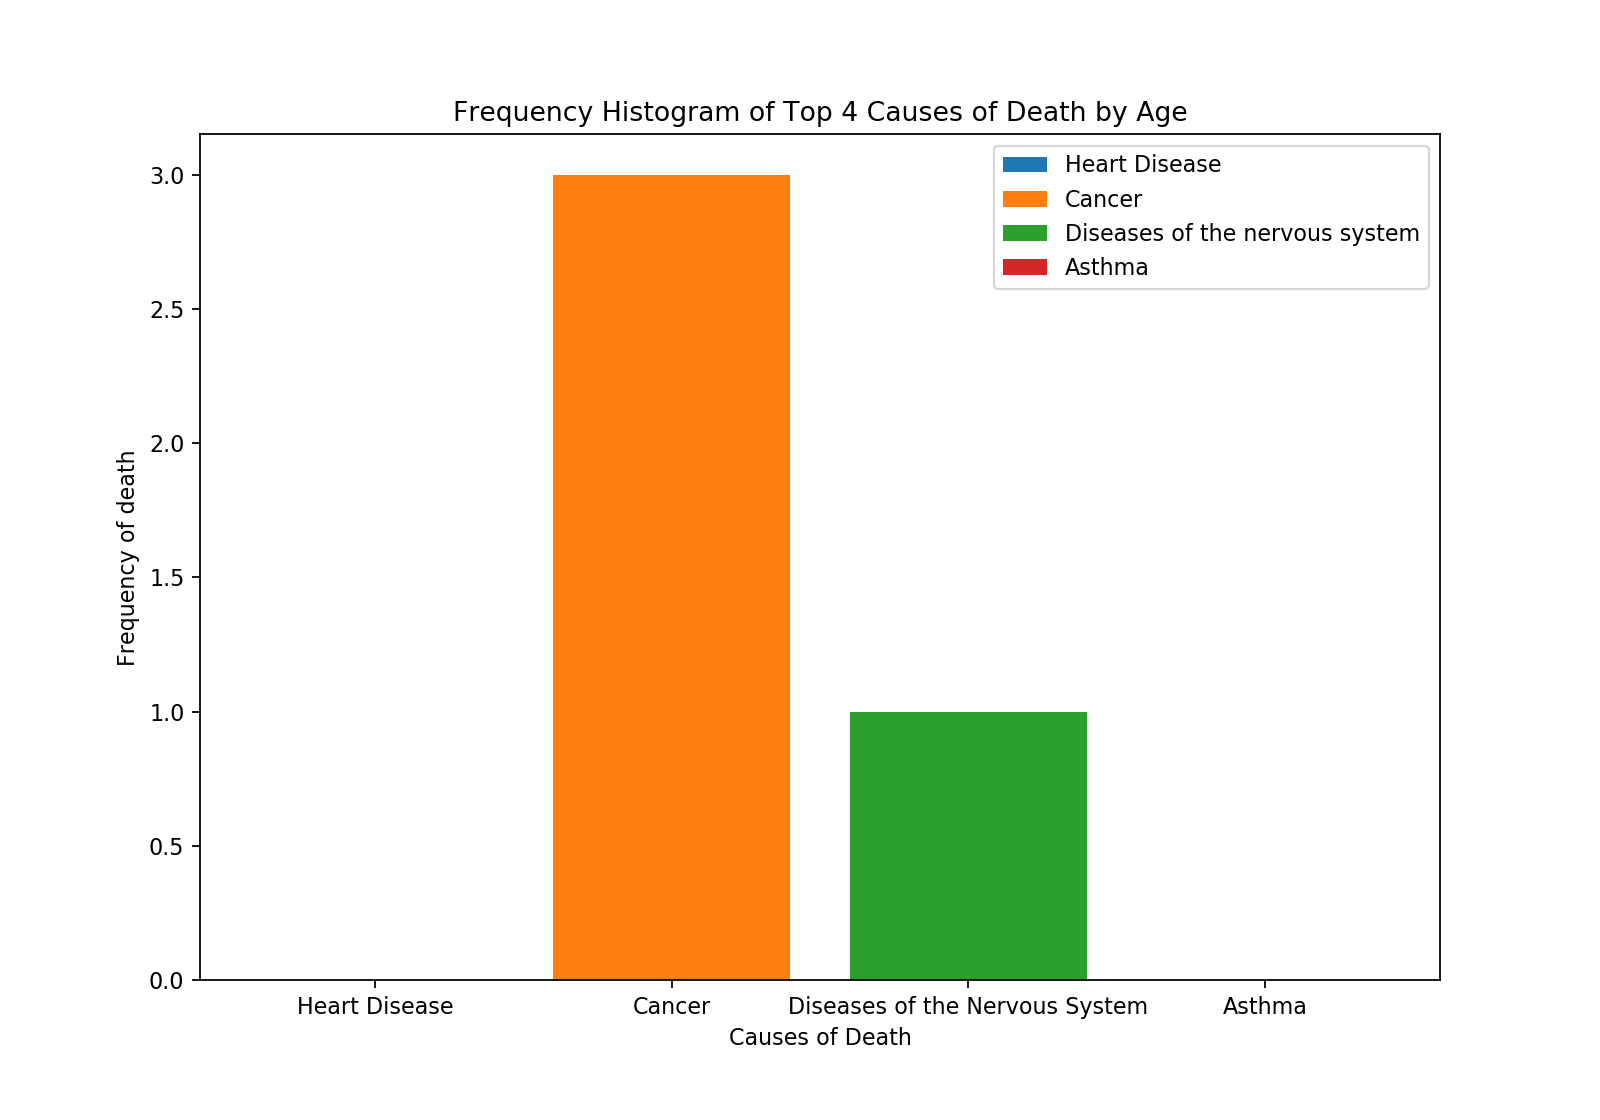

In [30]:
kwargs = dict(alpha=0.7, bins=25, edgecolor = 'white')
default_age = 45

ageSlider = IntSlider(min=0, max=111, value=default_age, description='Age Slider', continuous_update=True)
ageSlider.style.handle_color = 'lightgreen'
display(ageSlider)

fig = plt.figure(figsize=(10,7), dpi= 80)
ax = plt.subplot(111)
fig.gca().set(title='Frequency Histogram of Top 4 Causes of Death by Age', ylabel='Frequency of death', xlabel = "Causes of Death")

def make_plot(age):
    x1 = heart_df.loc[heart_df['age'] == age]
    x2 = cancer_df.loc[cancer_df['age'] == age]
    x3 = nervous_df.loc[nervous_df['age'] == age]
    x4 = asthma_df.loc[asthma_df['age'] == age]
    
    x1_count = x1['age'].sum()/age
    x2_count = x2['age'].sum()/age
    x3_count = x3['age'].sum()/age
    x4_count = x4['age'].sum()/age
    
    ax.bar('Heart Disease', x1_count, label='Heart Disease')
    ax.bar('Cancer', x2_count, label='Cancer')
    ax.bar('Diseases of the Nervous System', x3_count, label='Diseases of the nervous system')
    ax.bar('Asthma', x4_count, label='Asthma')
    ax.set(title='Frequency Histogram of Top 4 Causes of Death by Age', ylabel='Frequency of death', xlabel = "Causes of Death")

    ax.legend()
    
def update_plot(ageSlider):
    ax.cla()
    age = ageSlider['new']
    make_plot(age)

make_plot(default_age)
ageSlider.observe(update_plot, names='value')

### How this visualization help users compare the 4 different death causes by Age:
* #### The plot type chosen bar graphs which show the causes of death (only 4 have been chosen) the frequency of which changes by the chosen aage which can be set on the slider. 
* #### The colors of the bars are different to distinctly tell the difference between the 4 causes of death, which are depicted to the user using a legend to establish a better visual connection.
* #### A user can use the slider and see how the causes of death vary for him/ her going into the future. 
***

<h2>Appendix</h2>

<h3>Count unique values of a column</h3>

In [24]:
data["group"].value_counts()

Heart Disease                        27079
Cancer                               22894
Diseases of the nervous system        7084
Asthma                                6137
Diabetes                              5615
Mental or Behavioral                  5134
Stroke                                4959
Respiratory Condition                 4075
Drug Use                              3429
Liver Disease                         2836
Kidney Condition                      1973
Infection                             1770
Fall                                  1279
Motor Vehicle Accident                1239
Accident                               698
HIV/AIDS                               613
Muscle/Bone Condition                  500
Bladder Condition                      409
Seizures                               327
Congenital Anomalies                   309
Birth Condition                        307
Unkown cause                           305
Other                                  249
Skin Condit

<h3>Testing out deleting last value from an array</h3>

In [25]:
bin_edges = np.delete(bin_edges, -1)
print(bin_edges)

[ 3.    6.72 10.44 14.16 17.88 21.6  25.32 29.04 32.76 36.48 40.2  43.92
 47.64 51.36 55.08 58.8  62.52 66.24 69.96 73.68 77.4  81.12 84.84 88.56
 92.28]


<h3>Failed concatenation attempt</h3>

In [26]:
np.concatenate((counts, bin_edges))

array([  1.  ,   0.  ,   0.  ,   6.  ,  60.  , 170.  , 220.  , 179.  ,
       252.  , 207.  , 210.  , 310.  , 373.  , 392.  , 281.  , 288.  ,
       212.  ,  79.  ,  67.  ,  47.  ,  24.  ,  19.  ,  14.  ,  15.  ,
         3.  ,   3.  ,   6.72,  10.44,  14.16,  17.88,  21.6 ,  25.32,
        29.04,  32.76,  36.48,  40.2 ,  43.92,  47.64,  51.36,  55.08,
        58.8 ,  62.52,  66.24,  69.96,  73.68,  77.4 ,  81.12,  84.84,
        88.56,  92.28])

<h3>Something went wrong with the seaborn frequency polygon</h3>

<IPython.core.display.Javascript object>


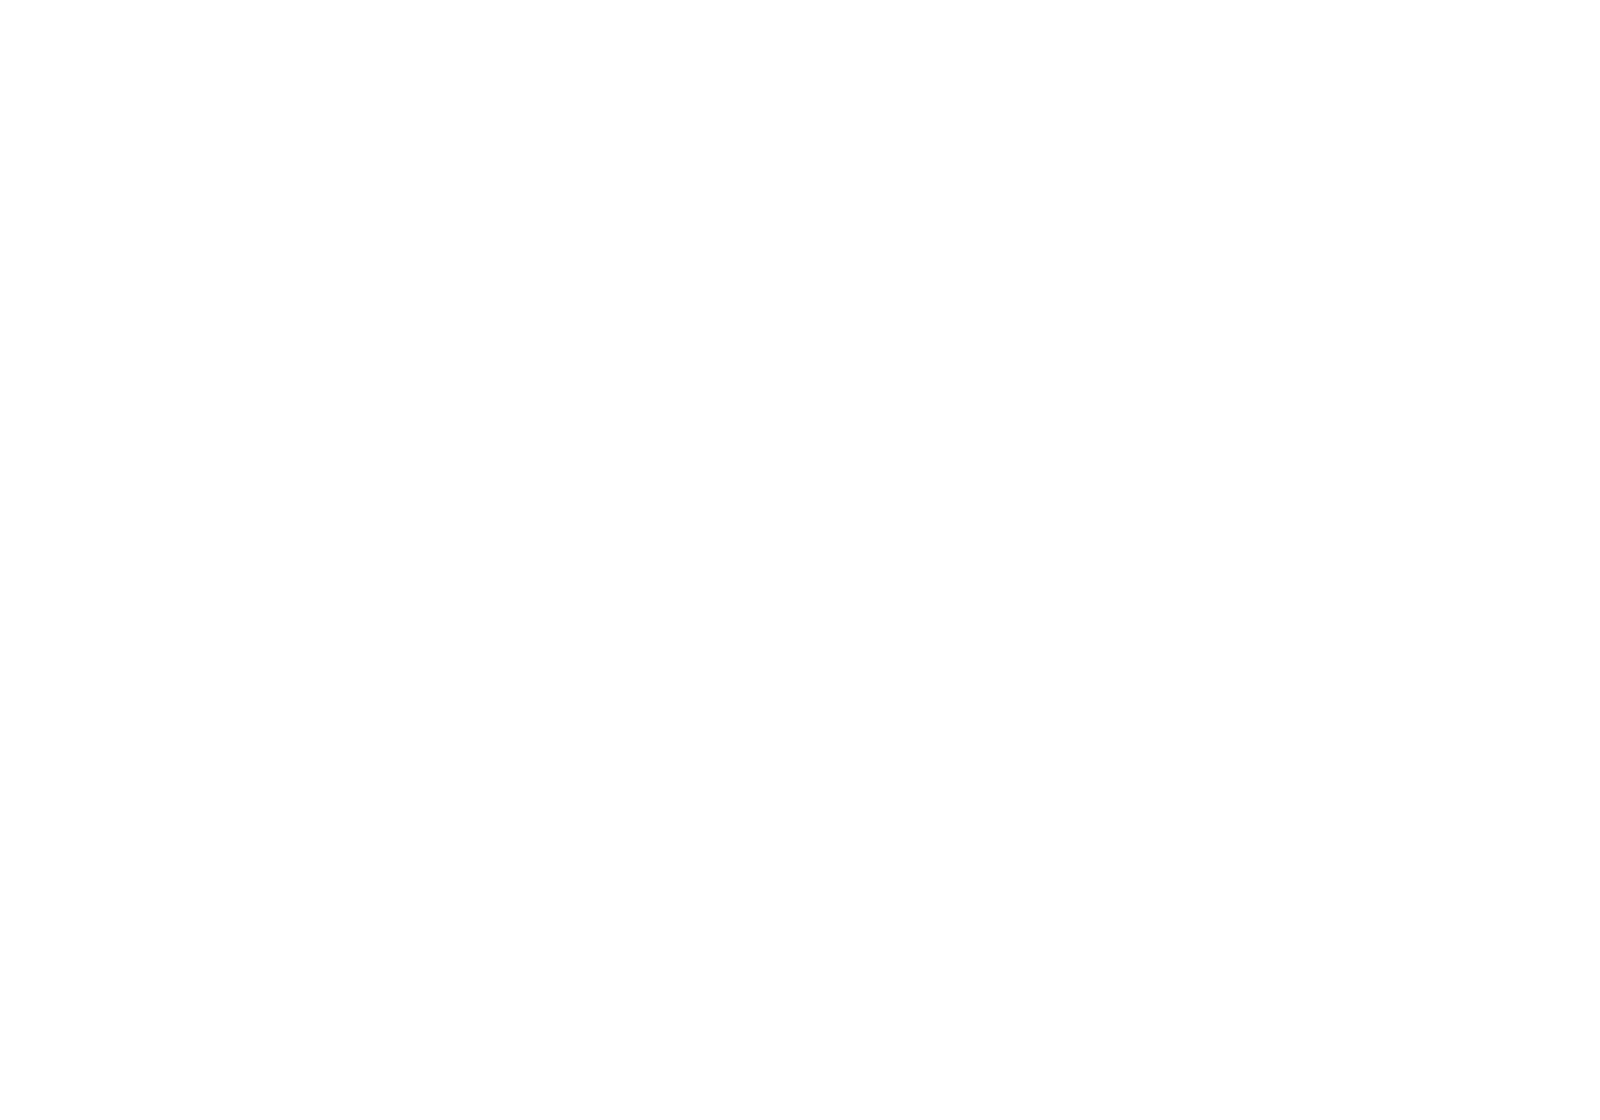

<IPython.core.display.Javascript object>


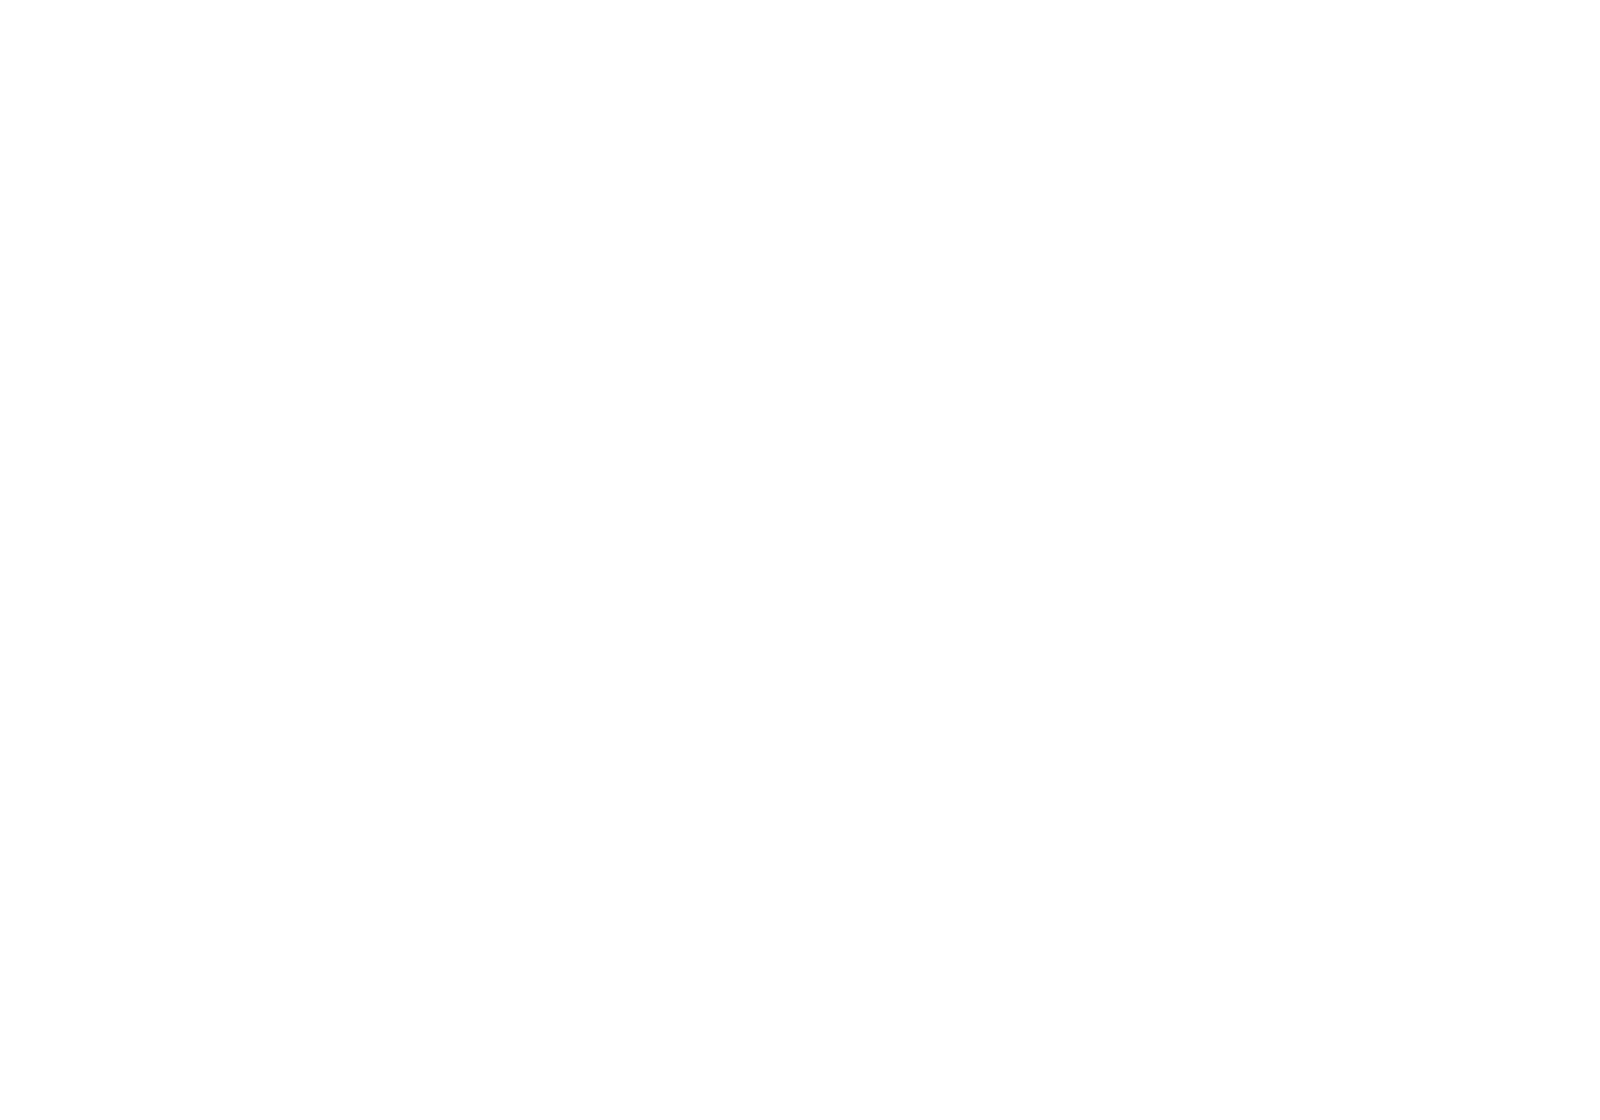

In [27]:
import seaborn as sns
fig = plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color='green', label='Heart Disease')
sns.distplot(x2, color='blue', label='Cancer')
sns.distplot(x3, color='cyan', label='Diseases of the nervous system')
sns.distplot(x4, color='yellow', label='Asthma')
# plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
plt.gca().set(title='Frequency Histogram of Top 4 Causes of Death by Age', ylabel='Frequency', xlabel = "Age")
fig.legend(loc = 'upper left')
plt.show()

<h3>Parting dataset based on age</h3>

In [28]:
@interact
def show_age_more_than(column='age', x=(0, 111, 1)):
    return heart_df.loc[x1 < x]

interactive(children=(Text(value='age', description='column'), IntSlider(value=55, description='x', max=111), …